In [1]:
# Requirements

%pip install -q ipywidgets
%pip install -q plotly
%pip install -q numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Test showing plots

import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

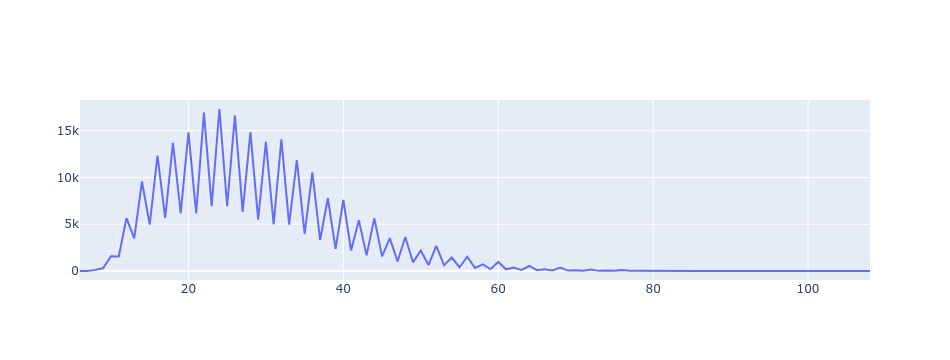

In [3]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display

out_neg = pd.read_csv('benchmark_out/out_neg.csv')
out = pd.read_csv('benchmark_out/out.csv')

def graphDataQuality(table, x_name='formulaSize'):
    xs = table[x_name].unique()
    xs.sort()
    xs = list(range(xs[0], xs[-1]+1))

    countsPerSize = [len(table[table[x_name]==x]) for x in xs ]
    fig = go.Figure(go.Scatter(x=xs, y=countsPerSize, name="formulas count"))
    fig.show()

# display(out_neg.describe())
# display(out.describe())

graphDataQuality(out_neg)

In [4]:
def graphColsMean(table, x_name='formulaSize', ys=["timeTStarMs", "timeLabelMs"], yLog=True):
    xs = table[x_name].unique()
    xs.sort()
    xs = list(range(xs[0], xs[-1]+1))
    
    fig = go.Figure()
    for y_name in ys:
        fig.add_trace(go.Scatter(x=xs, y=[ table[table[x_name]==x][y_name].mean() for x in xs ], name=y_name))
    
    if yLog:
        fig.update_yaxes(type="log")

    fig.update_layout(autosize=True, height=500) 
    fig.show()

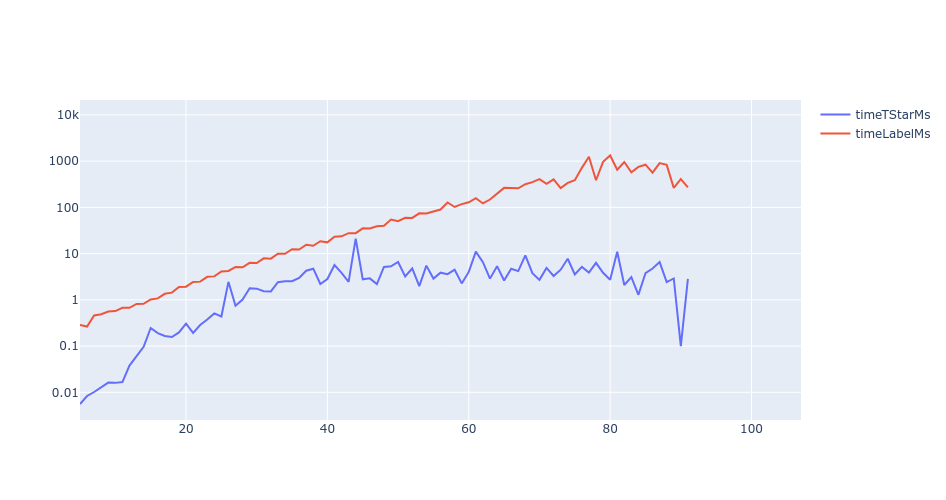

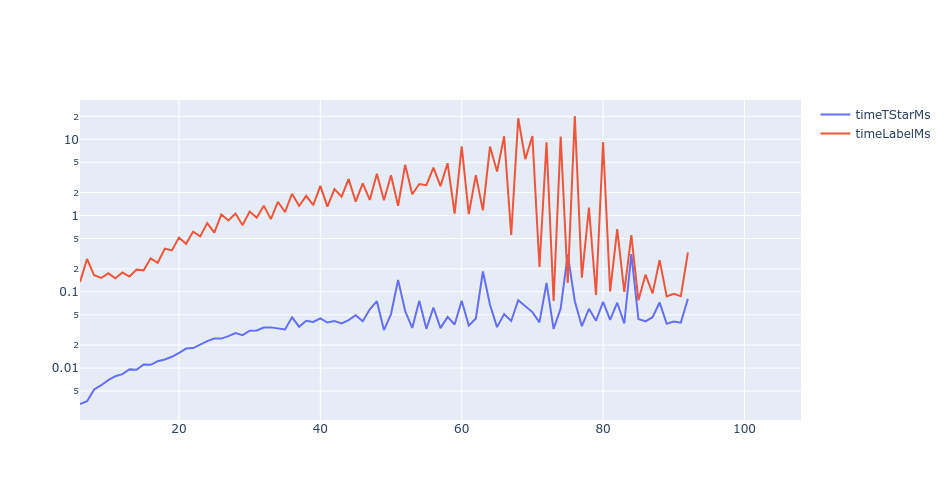

In [8]:
graphColsMean(out)
graphColsMean(out_neg)

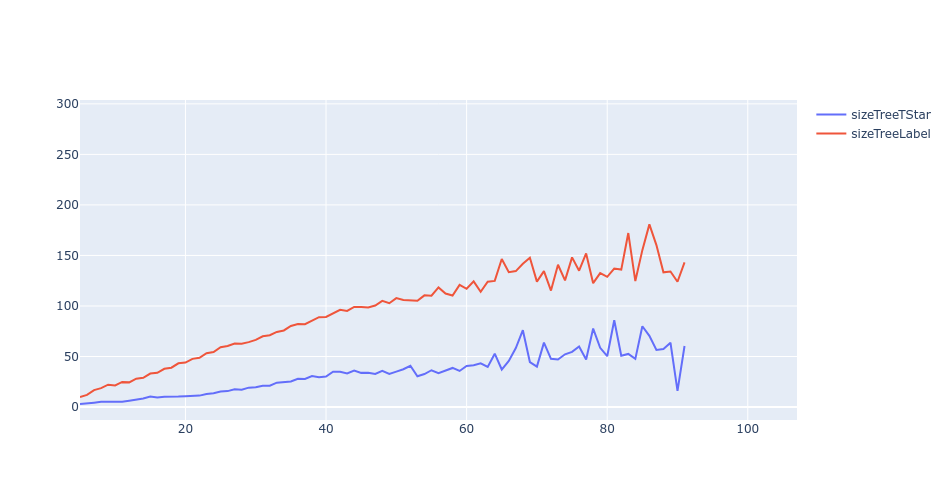

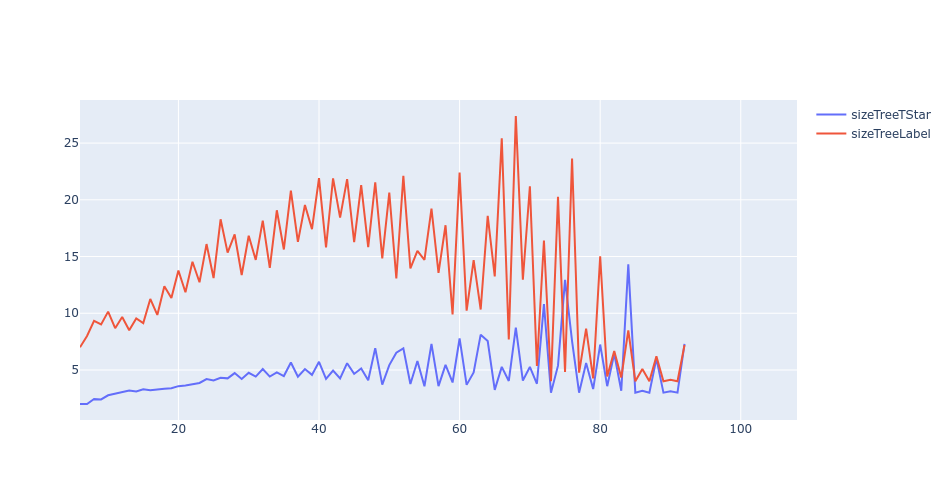

In [9]:
graphColsMean(out, ys=["sizeTreeTStar", "sizeTreeLabel"], yLog=False)
graphColsMean(out_neg, ys=["sizeTreeTStar", "sizeTreeLabel"], yLog=False)

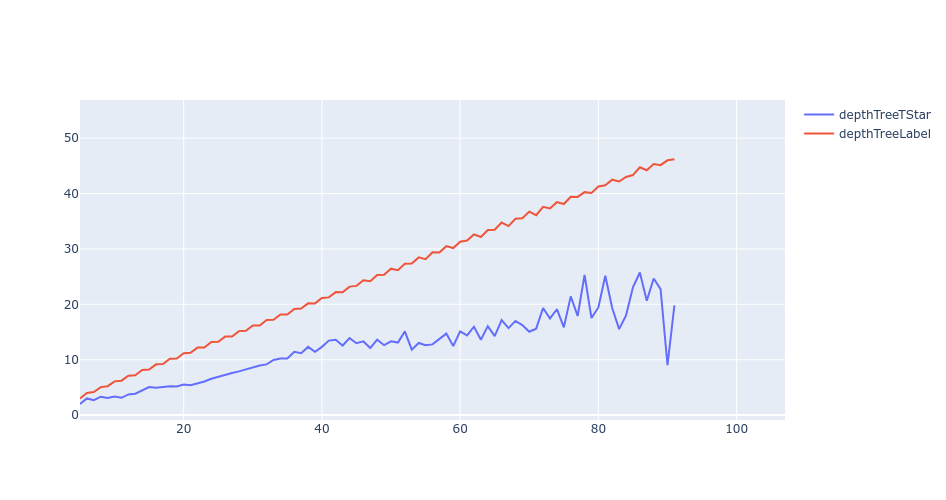

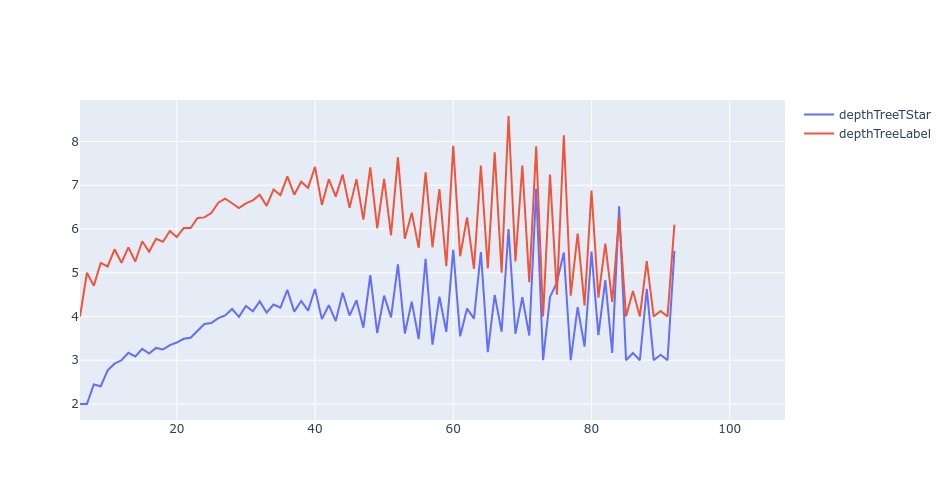

In [10]:
graphColsMean(out, ys=["depthTreeTStar", "depthTreeLabel"], yLog=False)
graphColsMean(out_neg, ys=["depthTreeTStar", "depthTreeLabel"], yLog=False)